In [1]:
import numpy as np
import cv2
import os
import sys
from PIL import Image
# import png
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

from tow_inspection_util import *

# Normalize images 

In [26]:
sourceFolder = '/Users/zeekile/Desktop/Infy/nlr_data/20200422_Morning_range/'
# sourceFolder = '/Users/zeekile/Downloads/'
# sourceFolder = '/Users/zeekile/Desktop/Infy/nlr_data/goodRange/'

for fileName in os.listdir(sourceFolder): 
    if fileName.endswith(".png"):
        print(fileName)
        filePath = os.path.join(sourceFolder, fileName)
        img = (cv2.imread(filePath, -1)).astype('int32')
        imgOriginalCopy = np.copy(img)
        imgFilled = np.copy(img)
        # printStatus(fileName, img)
        
        # fill the black holes
        # plotImage(imgOriginalCopy)
        for rowId in range(len(imgFilled)):
            imgFilled[rowId] = filterRow(imgFilled[rowId])
            # imgFilled[rowId] = fitProfileAndNormalize(imgFilled[rowId])
        # plotImage(imgFilled)
        
        # fit two selected profiles, and substract the frame with interpolation
        paramsTop = fitProfile(imgFilled[0])
        paramsMiddle = fitProfile(imgFilled[int(len(imgFilled)/2)])
        paramsBottom = fitProfile(imgFilled[-1])
        x = np.array(range(len(imgFilled[0])))
        for rowId in range(len(imgFilled)):
            if rowId <= int(len(imgFilled)/2):
                wBottom = rowId / int(len(imgFilled)/2)
                wTop = 1 - wBottom
                [a,b,c] = interpolationRows(paramsTop, paramsMiddle, wTop, wBottom)
                imgFilled[rowId] = imgFilled[rowId] - (np.square(x)*a + x*b + c)
            else:
                wBottom = (rowId - int(len(imgFilled)/2)) / (len(imgFilled) - int(len(imgFilled)/2))
                wTop = 1 - wBottom
                [a,b,c] = interpolationRows(paramsMiddle, paramsBottom, wTop, wBottom)
                imgFilled[rowId] = imgFilled[rowId] - (np.square(x)*a + x*b + c)
        minVal = np.amin(imgFilled) 
        imgFilled = imgFilled - minVal
        
        # prune some pure black images
        if ((imgFilled[np.nonzero(imgFilled)]).shape)[0] == 0:
            continue
        minval = np.min(imgFilled[np.nonzero(imgFilled)])
        normalized = (((imgFilled - minval)/(np.max(imgFilled) - minval)) * 255).astype('int')
        # plotImage(normalized)
        
        try:
            saveImg(fileName, '/Volumes/ZEEKANDISK/cv2write/normalized/20200422_Morning_range/', normalized)
        except:
            print("[0]Unexpected error from file:", fileName, sys.exc_info()[0])
            raise
        
        try:
            normalized = np.uint8(normalized)
            im_color = cv2.applyColorMap(normalized, cv2.COLORMAP_BONE)
            cv2.imwrite('/Volumes/ZEEKANDISK/cv2write/colored/20200422_Morning_range/'+fileName, im_color)
        except:
            print("[1]Unexpected error from file:", fileName, sys.exc_info()[0])
            raise

#     break

buffer_2020-04-22-074018.615061742.json_range.png
buffer_2020-04-22-075841.344916367.json_range.png
buffer_2020-04-22-074305.587144261.json_range.png
buffer_2020-04-22-074138.302786622.json_range.png
buffer_2020-04-22-070539.821983643.json_range.png
buffer_2020-04-22-073236.839940719.json_range.png
buffer_2020-04-22-080457.990005081.json_range.png
buffer_2020-04-22-075314.443818671.json_range.png
buffer_2020-04-22-070813.45273709.json_range.png
buffer_2020-04-22-073946.226575468.json_range.png
buffer_2020-04-22-074203.865635505.json_range.png
buffer_2020-04-22-074046.451604292.json_range.png
buffer_2020-04-22-070804.110627260.json_range.png
buffer_2020-04-22-074417.394937339.json_range.png
buffer_2020-04-22-070847.712335909.json_range.png
buffer_2020-04-22-080425.273579847.json_range.png
buffer_2020-04-22-082259.676353035.json_range.png
buffer_2020-04-22-080218.938090347.json_range.png
buffer_2020-04-22-073654.625135436.json_range.png
buffer_2020-04-22-080531.275315375.json_range.png
b

buffer_2020-04-22-080551.342921672.json_range.png
buffer_2020-04-22-082138.468883875.json_range.png
buffer_2020-04-22-073812.921184668.json_range.png
buffer_2020-04-22-080639.105692943.json_range.png
buffer_2020-04-22-075531.131663859.json_range.png
buffer_2020-04-22-073127.174041431.json_range.png
buffer_2020-04-22-073917.257712846.json_range.png
buffer_2020-04-22-071003.479793681.json_range.png
buffer_2020-04-22-080338.438532745.json_range.png
buffer_2020-04-22-080602.828735925.json_range.png
buffer_2020-04-22-073002.237955443.json_range.png
buffer_2020-04-22-074507.241887279.json_range.png
buffer_2020-04-22-080612.717876692.json_range.png
buffer_2020-04-22-082241.702147318.json_range.png
buffer_2020-04-22-075549.949595526.json_range.png
buffer_2020-04-22-080203.434091232.json_range.png
buffer_2020-04-22-073202.320577979.json_range.png
buffer_2020-04-22-075713.612906023.json_range.png
buffer_2020-04-22-075212.224771919.json_range.png
buffer_2020-04-22-070748.548345623.json_range.png


# Find consecutive images

In [39]:
# write out the file names to find out consecutive images
originFolder = '/Volumes/ZEEKANDISK/nlr/original/20200422_afternoon_range/'
selectFolder = '/Volumes/ZEEKANDISK/nlr/selection/20200422_afternoon_range/'
originList = os.listdir(originFolder)
selectList = os.listdir(selectFolder)
originList.sort()
selectList.sort()
originList = originList[int(len(originList)/2):]

for fileName in originList:
    if fileName.endswith(".png"):
        if fileName in selectList:
            print(fileName, '-------------------')
        else:
            print(fileName)

buffer_2020-04-22-122640.489188254.json_range.png
buffer_2020-04-22-122643.674323395.json_range.png -------------------
buffer_2020-04-22-122653.120210515.json_range.png
buffer_2020-04-22-122656.305522128.json_range.png
buffer_2020-04-22-122659.490906810.json_range.png
buffer_2020-04-22-122702.676189588.json_range.png
buffer_2020-04-22-122705.904694395.json_range.png -------------------
buffer_2020-04-22-122709.89958755.json_range.png
buffer_2020-04-22-122715.367120251.json_range.png
buffer_2020-04-22-122718.552439121.json_range.png
buffer_2020-04-22-122721.737816858.json_range.png
buffer_2020-04-22-122724.923038495.json_range.png -------------------
buffer_2020-04-22-122728.266507326.json_range.png
buffer_2020-04-22-122737.506725725.json_range.png
buffer_2020-04-22-122740.692116399.json_range.png
buffer_2020-04-22-122743.877466419.json_range.png
buffer_2020-04-22-122747.62657766.json_range.png -------------------
buffer_2020-04-22-122750.759413260.json_range.png
buffer_2020-04-22-1227

# Tow detection 

In [18]:
import pandas as pd

In [19]:
imgSourceFolders = '/home/mengl/Documents/nlr/consecutive/'
imgTargetFolders = '/home/mengl/Documents/nlr/towed/'
folderList = os.listdir(imgSourceFolders)
folderList.sort()
print(folderList)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11_overflow', '12_jump', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']


In [20]:
def fit_edge(gradients):
    # define a function to be fitted
    def func(x, a, b, c):
        return np.square(x)*a + x*b + c 
    
    popt, pcov = curve_fit(func, range(len(gradients)), gradients)
    return popt

In [32]:
def tow_detection(img, num_tow=8, rigidity=8):
    """
    1. Need to differentiate the curved ones and straight ones.
    2. Separate the cases for different tows
    Inputs:
        num_tow: the number of tows should be detected from the image.
        rigidity: how straight the fitted curve along edges.
    Return:
        edges: [(num_tow+1) x 2 x height]
    """
    # filtering the images
    medianed = cv2.medianBlur(img, 13)
    # plotImage(medianed) 
    _, median_gradient = np.gradient(img) # only the horizontal gradient is needed, on medianed/original image

    # create a mean vertically and find gradient on it
    means = np.mean(medianed, axis=0)

    # find course edges
    gradientArr = np.gradient(means)
    sortInds = np.argsort(np.absolute(gradientArr))
    maxGrdInd = sortInds[-1]
    sortIndsWithoutMax = sortInds[np.where(np.logical_or(sortInds>(maxGrdInd+10), sortInds<(maxGrdInd-10)))]
    secMaxGrdInd = sortIndsWithoutMax[-1]
    print("The course edges are at ", maxGrdInd, secMaxGrdInd)
    
    y = np.arange(len(img), dtype=int) 
    edges = np.empty([num_tow + 1, 2, len(img)])
    
    # finding local maximal gradients
    tow_width = int((max(maxGrdInd, secMaxGrdInd) - min(maxGrdInd, secMaxGrdInd))/num_tow)
    edge_list = [min(maxGrdInd, secMaxGrdInd) + i*tow_width for i in range(num_tow + 1)]
    for i in range(len(edge_list)):
        mid = edge_list[i]
        left = mid - int(tow_width/rigidity)
        right = mid + int(tow_width/rigidity)
        search_range = median_gradient[:, left:right]
        max_gradient = np.argmax(search_range, axis=1) + left
        # print("Max gradient of edge", i, ", its shape is", max_gradient.shape)
        
        [a, b, c] = fit_edge(max_gradient)
        x = range(len(max_gradient))
        fitted_curve = np.square(x)*a + x*b + c
        # print("Fitted curve shape is", fitted_curve.shape)
        
        edges[i] = np.concatenate((fitted_curve[:, None], y[:, None]), axis=0).reshape((2, -1)) 
    return edges

buffer_2020-04-22-153041.775518774.json_range.png
buffer_2020-04-22-153038.589844701.json_range.png
buffer_2020-04-22-153044.960547171.json_range.png


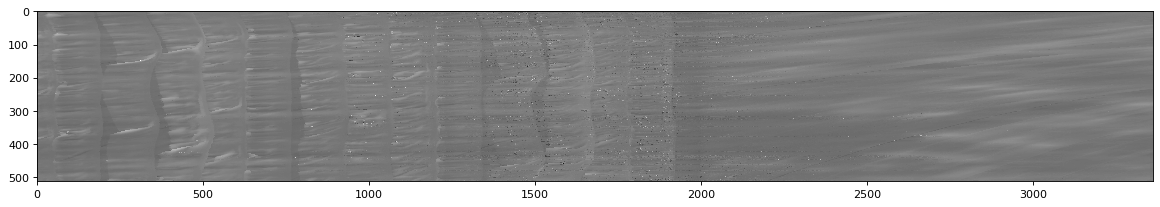

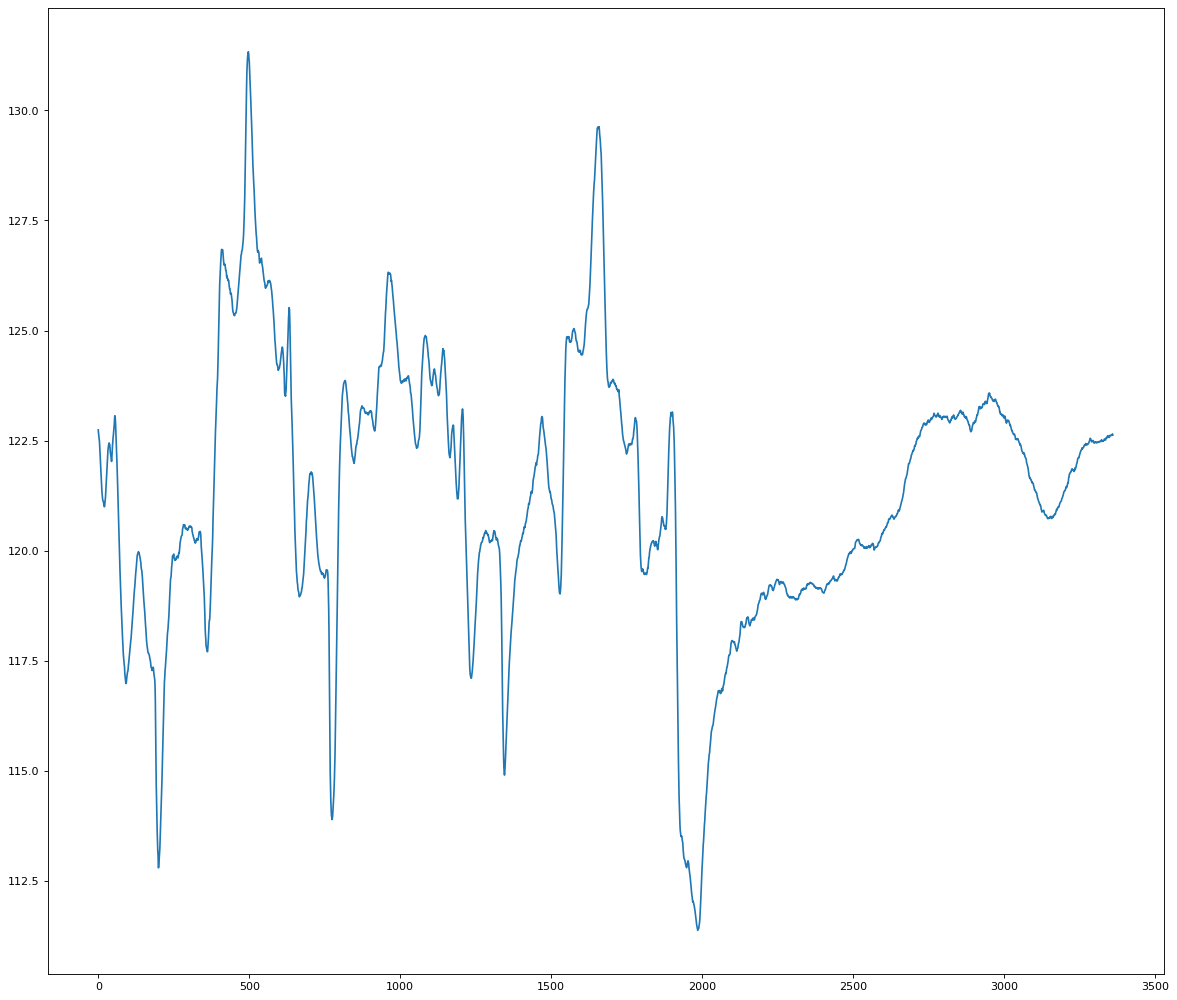

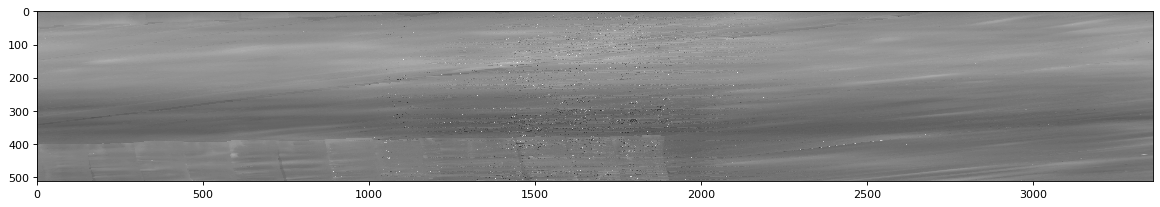

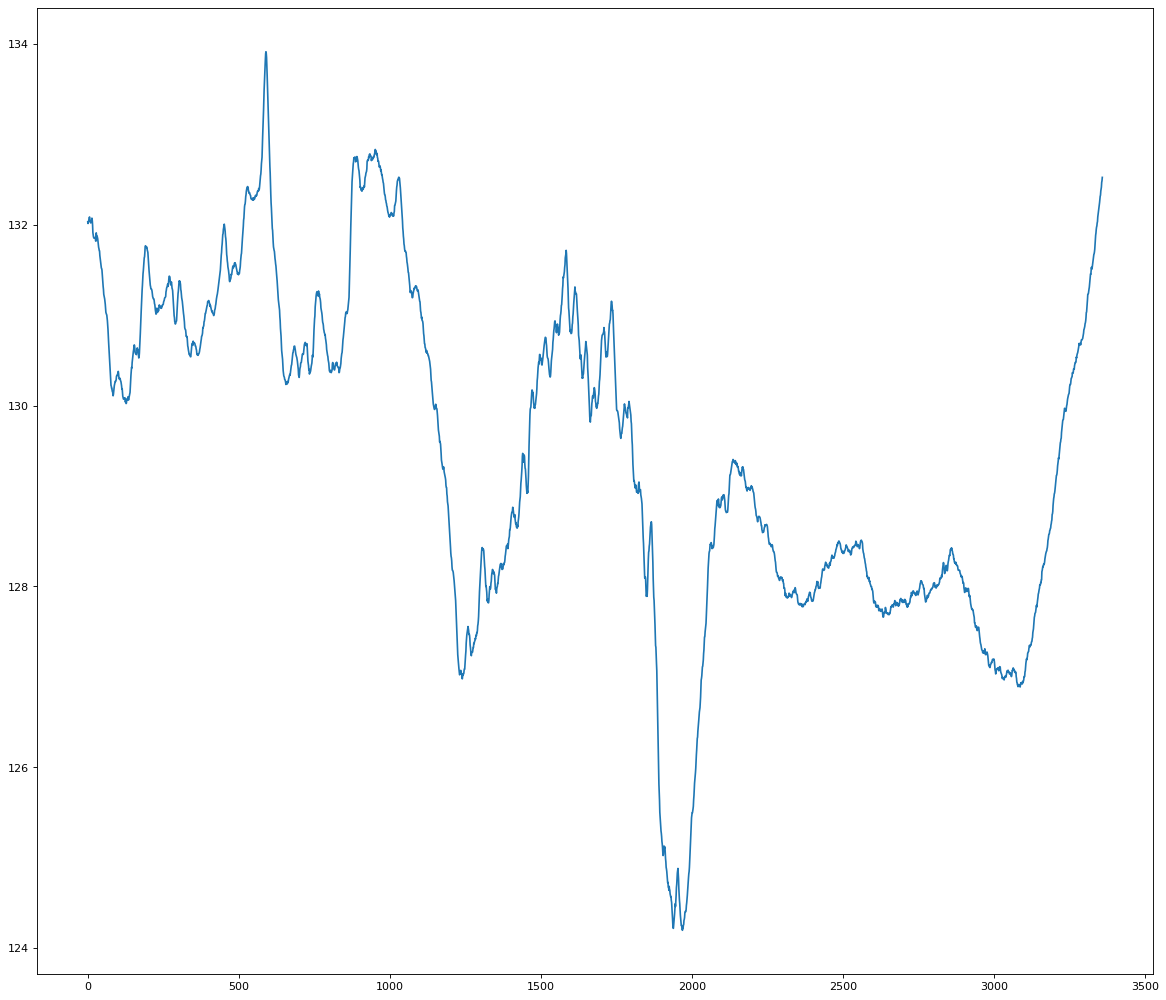

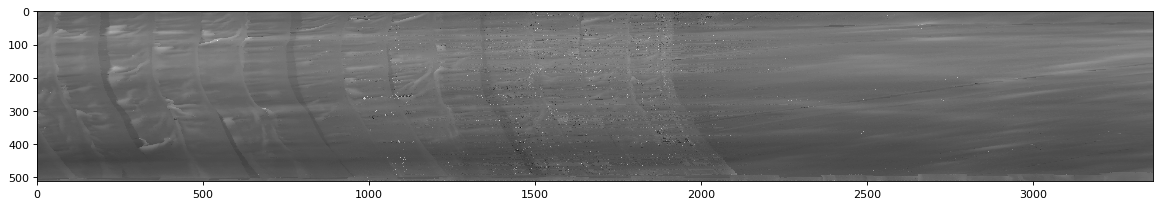

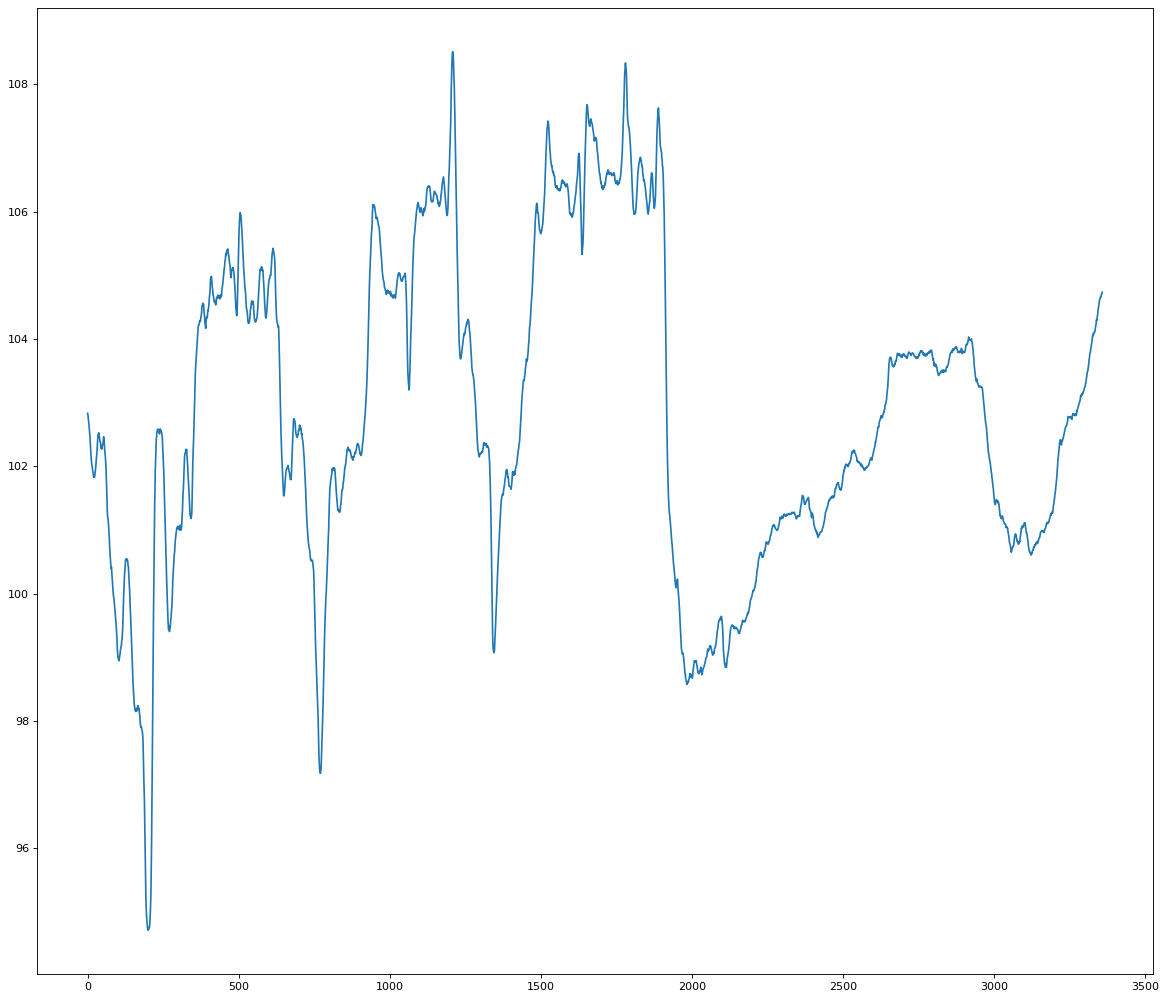

In [31]:
np.set_printoptions(threshold=sys.maxsize)
for folder in folderList[:20]:
    batchDir = imgSourceFolders + folder
    for file in os.listdir(batchDir):
        if file.endswith(".png") and not file.startswith("._"):
            print(file)
            filePath = os.path.join(batchDir, file)
            img = cv2.imread(filePath, 0)
            plotImage(img)
            
            edges = tow_detection(img)
            print("The edges shape is", edges.shape)
            
            # plot the edges on the image
            fig=plt.figure(figsize=(18, 16))
            plt.imshow(img, cmap='gray')
            
            for i in range(len(edges)):
                x = edges[i, 0, :]
                y = edges[i, 1, :]
                plt.plot(x, y, '--', linewidth=1, color='firebrick')
            plt.show()
        # break
    break

In [ ]:
def fit_edge_high_order(gradients):
    # Defined a third order function to be fitted, as curvature of steered tow
    def func(x, a, b, c):
        return np.power(x, 3)*a + np.power(x, 2)*b + x*c + d 
    
    popt, pcov = curve_fit(func, range(len(gradients)), gradients)
    return popt

In [123]:
def tow_detection_steer(img, num_tow=4, rigidity=4):
    # steered case
    if num_tow == 4:
        left_bound = 1300
        right_bound = 1930
        
    # filtering the images
    medianed = cv2.medianBlur(img, 5)
    # plotImage(medianed) 
    means_top = np.mean(medianed[:10,:], axis=0)
    
    # find course edges
    gradient_arr = np.gradient(means_top)
    sort_inds = np.argsort(np.absolute(gradient_arr[left_bound: left_bound+40])) + left_bound
    left_grad_ind = sort_inds[-1]
    sort_inds = np.argsort(np.absolute(gradient_arr[right_bound-30: right_bound])) + right_bound - 30
    right_grad_ind = sort_inds[-1]
    print("The course edges are at ", left_grad_ind, right_grad_ind)
    
    _, median_gradient = np.gradient(img) # only the horizontal gradient is needed, on medianed/original image
    
    y = np.arange(len(img), dtype=int) 
    edges = np.empty([num_tow + 1, 2, len(img)])
    
    # finding local maximal gradients
    tow_width = int((right_grad_ind - left_grad_ind)/num_tow)
    edge_list = [left_grad_ind + i*tow_width for i in range(num_tow + 1)]
    for i in range(len(edge_list[1:-1])):
        mid = edge_list[i+1]
        left = mid - int(tow_width/rigidity)
        right = mid + int(tow_width/rigidity)
        search_range = means_top[left:right]
        max_gradient = np.argmax(search_range) + left
        edge_list[i+1] = max_gradient
    
    edge_list = np.transpose(np.array([edge_list, [0]*len(edge_list)]))
    
    edges[:, :, 0] = edge_list.astype('int')
    print('edges', edges[:, :, 0])
    # now try row by row, afterwards, 5-20 rows; vertorize later
    for i in range(len(img)-1):
        middles = edges[-1]
        lefts = middles - 10 # emperical
        rights = middles + 10
        for j in range(len(middles)):
            search_range = median_gradient[i, lefts[j]:rights[j]]
            max_gradient = np.argmax(search_range) + lefts[j]
            edges[i+1][j] = max_gradient
    return edges

buffer_2020-04-22-153041.775518774.json_range.png
The course edges are at  1323 1906
edges [[1323.    0.]
 [1466.    0.]
 [1629.    0.]
 [1741.    0.]
 [1903.    0.]]


/home/mengl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in subtract
/home/mengl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in add


TypeError: only integer scalar arrays can be converted to a scalar index

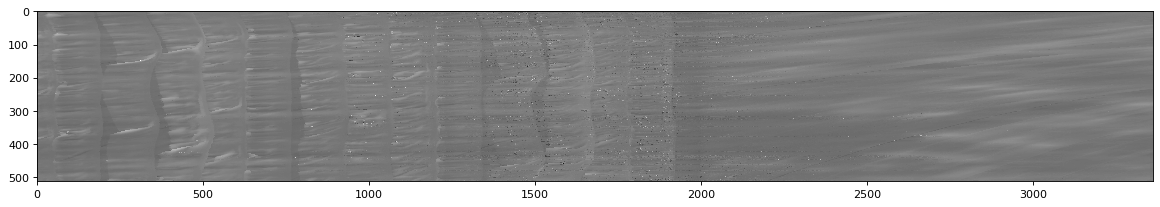

In [124]:
for folder in folderList[20:]:
    batchDir = imgSourceFolders + folder
    for file in os.listdir(batchDir):
        if file.endswith(".png") and not file.startswith("._"):
            print(file)
            filePath = os.path.join(batchDir, file)
            img = cv2.imread(filePath, 0)
            plotImage(img)
            
            edges = tow_detection_steer(img)
            
            # plot the edges on the image
            fig=plt.figure(figsize=(18, 16))
            plt.imshow(img, cmap='gray')
            
            for i in range(len(edges)):
                x = edges[i, 0, :]
                y = edges[i, 1, :]
                plt.plot(x, y, '--', linewidth=1, color='firebrick')
            plt.show()
        #break
    break

In [121]:
a = np.array([[21.0, 20.0, 22.0, 24.0, 18.0, 11.0, 23.0],
                [21.0, 20.0, 22.0, 24.0, 18.0, 11.0, 23.0],
                [21.0, 20.0, 25.0, 24.0, 18.0, 11.0, 23.0],
                [21.0, 20.0, 22.0, 99.0, 18.0, 11.0, 23.0],
                [21.0, 20.0, 22.0, 24.0, 18.0, 11.0, 23.0],
                [29.0, 20.0, 22.0, 24.0, 18.0, 11.0, 23.0]])
max_inds = np.argmax(a, axis=1)

print(a[:,max_inds])

[[24. 24. 22. 24. 24. 21.]
 [24. 24. 22. 24. 24. 21.]
 [24. 24. 25. 24. 24. 21.]
 [99. 99. 22. 99. 99. 21.]
 [24. 24. 22. 24. 24. 21.]
 [24. 24. 22. 24. 24. 29.]]
